# Fraud Detection in Financial Transactions

## Group Members:
1. **Malvis Kagiri - Scrum Master**
2. **Maryann Maina**
3. **Flavian Miano**
4. **Keith Madegwa**
5. **Patience Anono**
6. **Wema Mothoni**


## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Credit card fraud is defined as a fraudulent transaction (payment) that is made using a credit or debit card by an unauthorized user.Credit cards are now the most preferred way for customers to transact either offline or online, due to the advancement in communication and electronic commerce systems.This has sparked the proliferation and increase in the use of services such as e-commerce, tap and pay systems, online bills payment systems etc. As a consequence, fraudsters have also increased activities to attack transactions that are made using credit cards.It is therefore crucial to implement effective and efficient mechanisms that can detect credit card fraud to protect users from financial loss.

> **Problem Statement:** This project aims to develop a machine learning model that can accurately detect fraudulent financial transactions, and distinguish between legitimate and fraudulent transactions with a high degree of accuracy, minimizing the number of false positives and false negatives.

### b) Defining the Metric for Success

The success of the project will be measured by the accuracy, precision, recall, and F1-score of the developed machine learning model. The model should have a high accuracy in classifying fraudulent transactions, minimize false positives, and minimize false negatives.

#### Main objectives:
To develop an accurate and reliable machine learning model that can detect fraudulent activities in real-time

#### Other objectives:
- To contribute to the development of more accurate and effective fraud detection models for financial transactions.
- To provide a useful tool for individuals and organizations to detect and prevent fraudulent financial transactions, thereby minimizing financial losses and improving financial security.


### c) Understanding the context 

Credit card fraud has become a serious problem, and financial institutions and businesses need to develop advanced fraud detection techniques to counter the threat of fraudulent credit card transactions and identity theft. This project aims to develop an accurate and reliable machine learning model that can detect fraudulent financial transactions in real-time, improving financial security and minimizing financial losses.

### d) Recording the Experimental Design

1. Data collection from Kaggle dataset.
2. Data preprocessing and feature engineering.
3. Exploratory data analysis to gain insights into the dataset.
4. Model selection and training, including logistic regression, decision trees, and random forests.
5. Model evaluation and fine-tuning of the best-performing model.
6. Comparison of the final model with other models developed in the project.

### e) Dataset Overview

The dataset from Kaggle will be used for this project. This dataset contains financial transactions that have been simulated using a real-world financial transactions dataset. The dataset has 23 features, including transaction amount, transaction type, and account balance. The target variable is a binary indicator that indicates whether the transaction is fraudulent or not.

Below is the description of each column in the above dataset.
|Feature | Contents|
|:--- |:--- |
| index|Unique Identifier for each row|
|trans_date_trans_time|Transaction DateTime|
|cc_num|Credit Card Number of Customer|
|merchant|Merchant Name| 
|category|Category of Merchant|
|amt|Amount of Transaction|
|first|First Name of Credit Card Holder|
|last|Last Name of Credit Card Holder|
|gender| Gender of Credit Card Holder|
|street| Street Address of Credit Card Holder|
|city| City of Credit Card Holder|
|state| State of Credit Card Holder|
|zip|Zip of Credit Card Holder|
|lat|Latitude Location of Credit Card Holder|
|long|Longitude Location of Credit Card Holder|
|city_pop|Credit Card Holder's City Population|
|job|Job of Credit Card Holder|
|dob|Date of Birth of Credit Card Holder|
|trans_num|Transaction Number|
|unix_time|UNIX Time of transaction|
|merch_lat|Latitude Location of Merchant|
|merch_long|Longitude Location of Merchant|
|is_fraud|Fraud Flag <--- Target Class.|

## 2. Reading the Data

In [73]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [74]:
# Loading the Data from the source 
credit_df = pd.read_csv('C:/Users/Administrator/Desktop/ /Matrix/fraudTrain.csv')
credit_test_df = pd.read_csv('C:/Users/Administrator/Desktop/ /Matrix/fraudTest.csv')



## 3. Checking the Data

In [75]:
# Determining the no. of records in our dataset
credit_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [76]:
# Previewing the top of our train dataset
credit_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [77]:
# Previewing the bottom of our train dataset
credit_df.tail(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [78]:
# Previewing the top of our test dataset
credit_test_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [79]:
# Previewing the bottom of our test dataset
credit_test_df.tail(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [80]:
#Checking the shape
print(f'The train set has {credit_df.shape} rows and columns')

The train set has (1296675, 23) rows and columns


In [81]:
#Checking the shape
print(f'The test set has {credit_test_df.shape} rows and columns')

The test set has (555719, 23) rows and columns


In [82]:
# Checking whether each column has an appropriate datatype
credit_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [83]:
# Checking whether each column has an appropriate datatype
credit_test_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [84]:
# Checking for duplicates
credit_df.duplicated().sum()

0

In [85]:
# Checking the info 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [86]:
# Describing the data
credit_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [87]:
# Checking the info 
credit_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [88]:
# Describing the data
credit_test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [89]:
# Value counts for each column in train dataset
for col in credit_df.columns[1:]:
    print('\n' + col + '\n')
    print(credit_df[col].value_counts())


trans_date_trans_time

2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

cc_num

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

merchant

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
frau

In [90]:
# Value counts for each column in train dataset
for col in credit_test_df.columns[1:]:
    print('\n' + col + '\n')
    print(credit_df[col].value_counts())


trans_date_trans_time

2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

cc_num

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

merchant

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
frau

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [91]:
# Identifying the Missing Data
credit_test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [92]:
# Identifying the Missing Data
credit_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [93]:
# Checking for duplicates
credit_test_df.duplicated().sum()

0

In [94]:
# Dropping the unnamed column
credit_df.drop(credit_df.columns[0], axis=1, inplace=True)
credit_test_df.drop(credit_test_df.columns[0], axis=1, inplace=True)

In [95]:
# Converting date columns to datetime format

credit_df['trans_date_trans_time']=pd.to_datetime(credit_df['trans_date_trans_time'])
credit_df['trans_date']=credit_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credit_df['trans_date']=pd.to_datetime(credit_df['trans_date'])
credit_df['dob']=pd.to_datetime(credit_df['dob'])

credit_test_df['trans_date_trans_time']=pd.to_datetime(credit_test_df['trans_date_trans_time'])
credit_test_df['trans_date']=credit_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credit_test_df['trans_date']=pd.to_datetime(credit_test_df['trans_date'])
credit_test_df['dob']=pd.to_datetime(credit_test_df['dob'])



In [96]:
# Separate date and time components into separate columns
credit_df['trans_time'] = credit_df['trans_date_trans_time'].dt.time
credit_test_df['trans_time'] = credit_test_df['trans_date_trans_time'].dt.time
credit_df['hour'] = credit_df['trans_date_trans_time'].dt.hour
credit_test_df['hour'] = credit_test_df['trans_date_trans_time'].dt.hour

In [97]:
#dropping the trans_date_trans_time column
credit_df = credit_df.drop(columns='trans_date_trans_time')
credit_test_df = credit_test_df.drop(columns='trans_date_trans_time')

In [98]:
credit_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,0


## 6. Exploratory Analysis

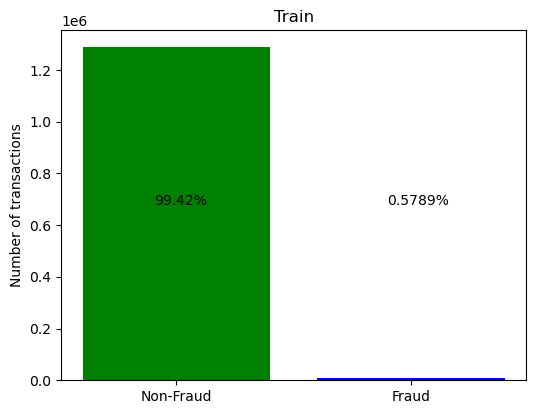

In [99]:
classes_train=credit_df['is_fraud'].value_counts()
normal_share_train=classes_train[0]/credit_df['is_fraud'].count()*100
fraud_share_train=classes_train[1]/credit_df['is_fraud'].count()*100

fig = plt.figure(figsize =(6, 10))
plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['g','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')
plt.show()

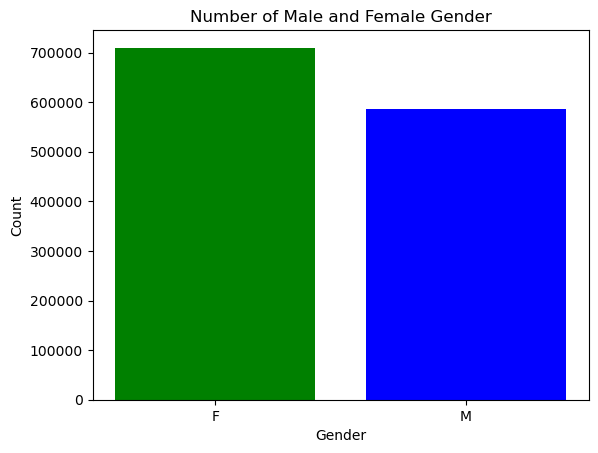

In [100]:
# Count the number of male and female gender
gender_count = credit_df['gender'].value_counts()

# Create a bar chart showing the number of male and female gender
plt.bar(gender_count.index, gender_count.values, color = ["green","blue"])
plt.title('Number of Male and Female Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### 6.5 What gender does the most transactions.

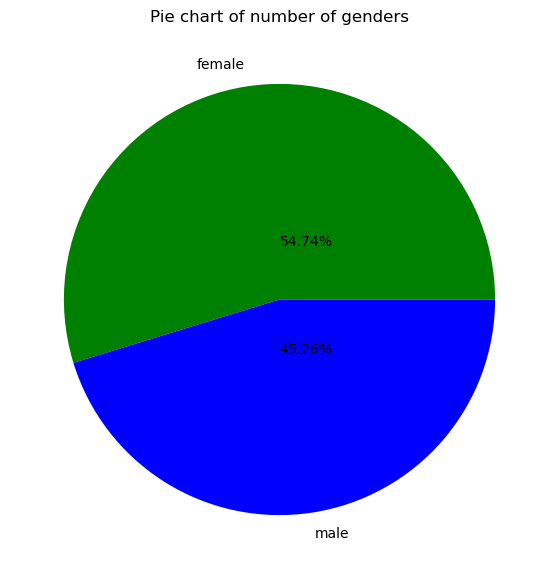

In [101]:
classes_train=credit_df['gender'].value_counts()
female_share_train=classes_train[0]/credit_df['gender'].count()*100
male_share_train=classes_train[1]/credit_df['gender'].count()*100

# Creating plot
labels = ['female', 'male']
colors = ['green', 'blue']
fig = plt.figure(figsize =(10, 7))
plt.pie(credit_df['gender'].value_counts(), labels = labels, colors = colors)
plt.annotate("{0:.4}%".format(female_share_train),(0.5, 0.6), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male_share_train),(0.5, 0.4), xycoords='axes fraction')
plt.title('Pie chart of number of genders')
 
# show plot
plt.show()

#### 6.6 Number of the genders that transactions have been flagged as fraud

In [102]:
fraud_df = credit_df[credit_df['is_fraud'] == 1]

In [103]:
fraud_df['gender'].value_counts()

M    3771
F    3735
Name: gender, dtype: int64

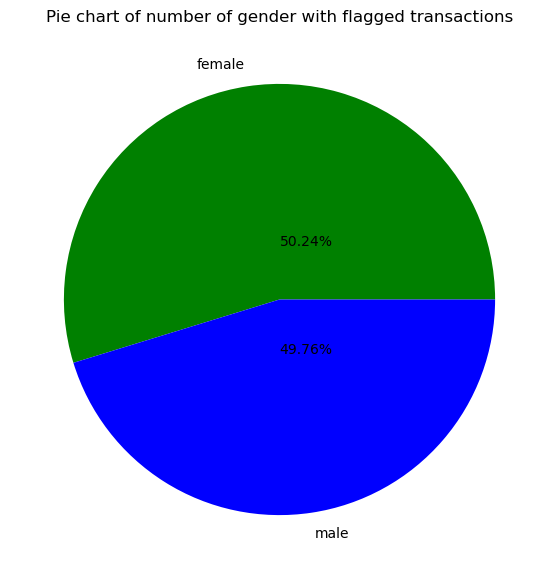

In [104]:
classes_train=fraud_df['gender'].value_counts()
female_share_train=classes_train[0]/fraud_df['gender'].count()*100
male_share_train=classes_train[1]/fraud_df['gender'].count()*100

# Creating plot
colors = ['green', 'blue']
labels = ['female', 'male']
fig = plt.figure(figsize =(10, 7))
plt.pie(credit_df['gender'].value_counts(), labels=labels, colors=colors)
plt.annotate("{0:.4}%".format(female_share_train),(0.5, 0.6), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male_share_train),(0.5, 0.4), xycoords='axes fraction')
plt.title('Pie chart of number of gender with flagged transactions')
 
# show plot
plt.show()

In [105]:
#### 6.9 Jobs of the card holders.

In [106]:
# Count of the jobs
credit_df['job'].value_counts().to_frame()

,job
Film/video editor,9779
Exhibition designer,9199
Naval architect,8684
"Surveyor, land/geomatics",8680
Materials engineer,8270
...,...
Information officer,8
Veterinary surgeon,8
Ship broker,7
Contracting civil engineer,7


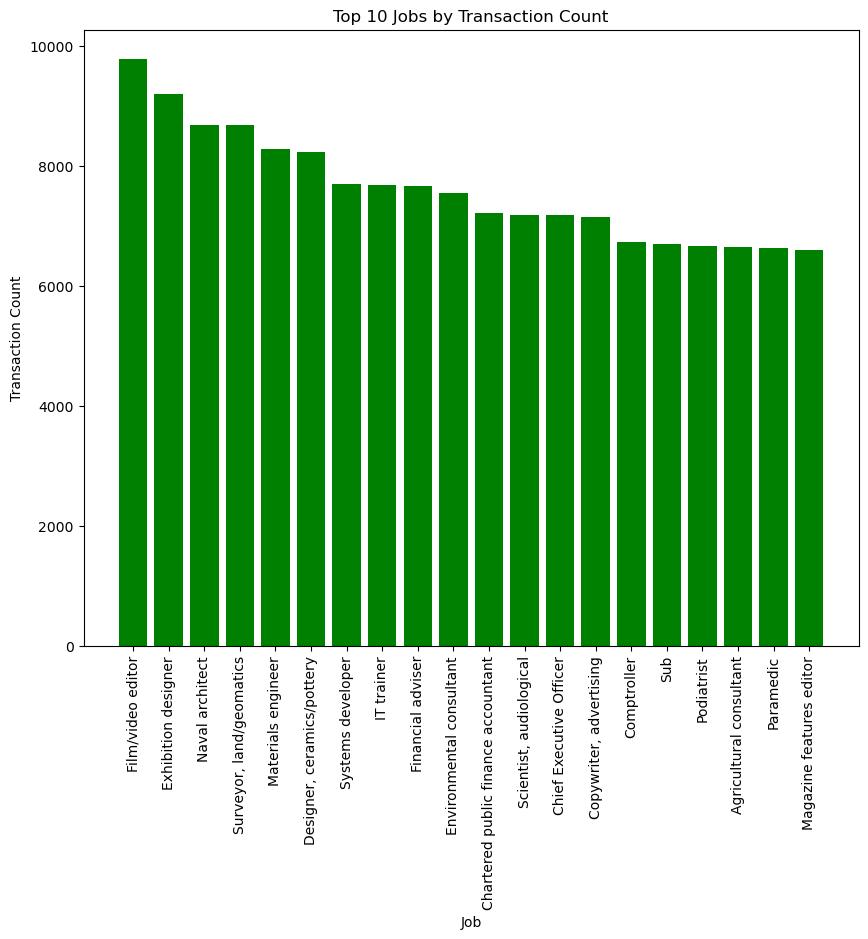

In [107]:
# Get the top 10 jobs by transaction count
top_jobs = credit_df['job'].value_counts().nlargest(20)

# Create a bar chart of the top 20 jobs
plt.figure(figsize=(10, 8))
plt.bar(top_jobs.index, top_jobs.values, color= "green")
plt.title('Top 10 Jobs by Transaction Count')
plt.xlabel('Job')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()


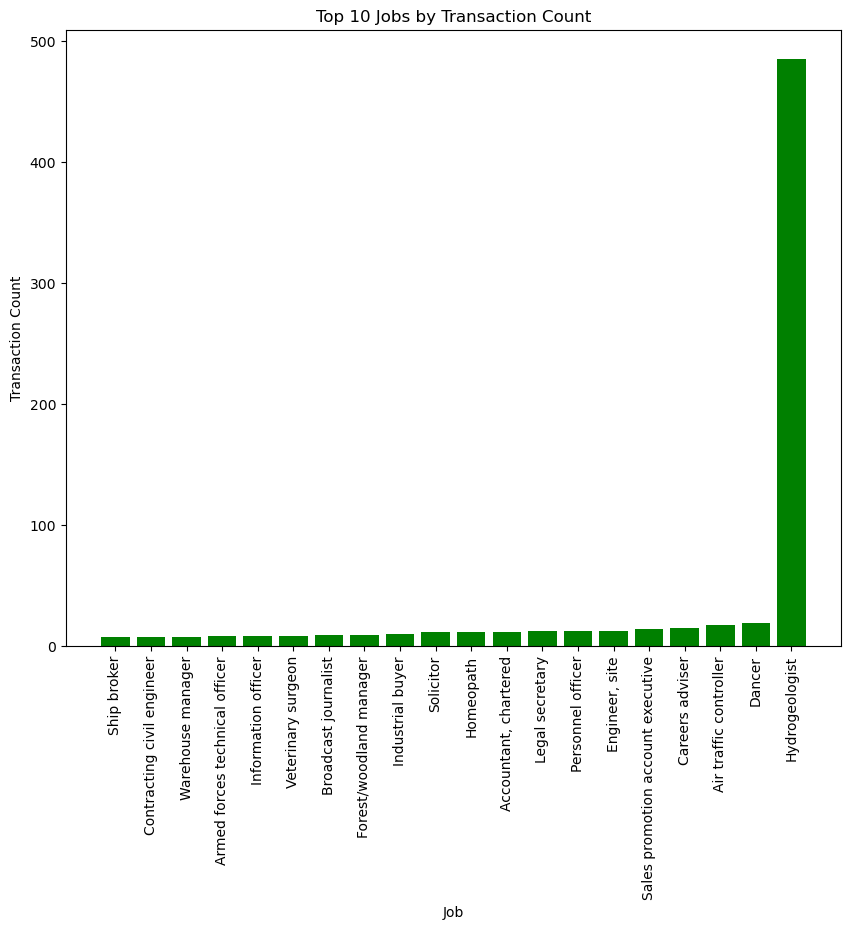

In [108]:
# Get the top 10 jobs by transaction count
top_jobs = credit_df['job'].value_counts().nsmallest(20)

# Create a bar chart of the top 20 jobs
plt.figure(figsize=(10, 8))
plt.bar(top_jobs.index, top_jobs.values, color= "green")
plt.title('Top 10 Jobs by Transaction Count')
plt.xlabel('Job')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()


In [109]:
# Grouping with the jobs column
job_df = credit_df.groupby(['job']).mean()

In [110]:
job_df = job_df.sort_values(by='amt', ascending=False)

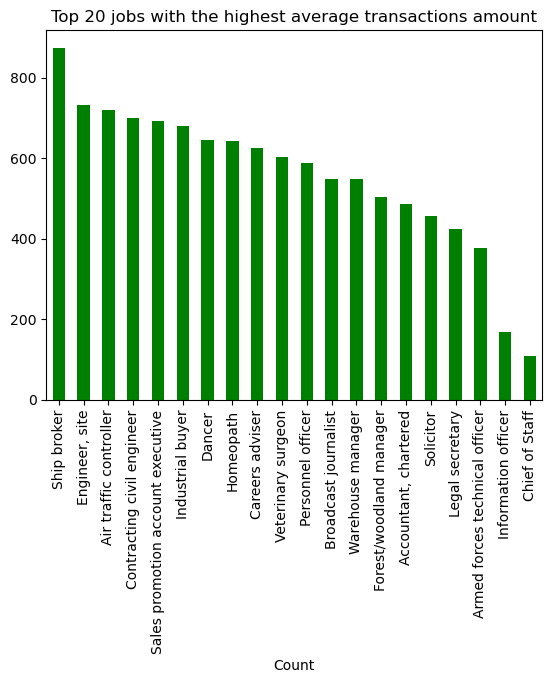

In [111]:
job_df['amt'][:20].plot(kind='bar', title='Top 20 jobs with the highest average transactions amount', \
                                xlabel='Count', color = 'g');

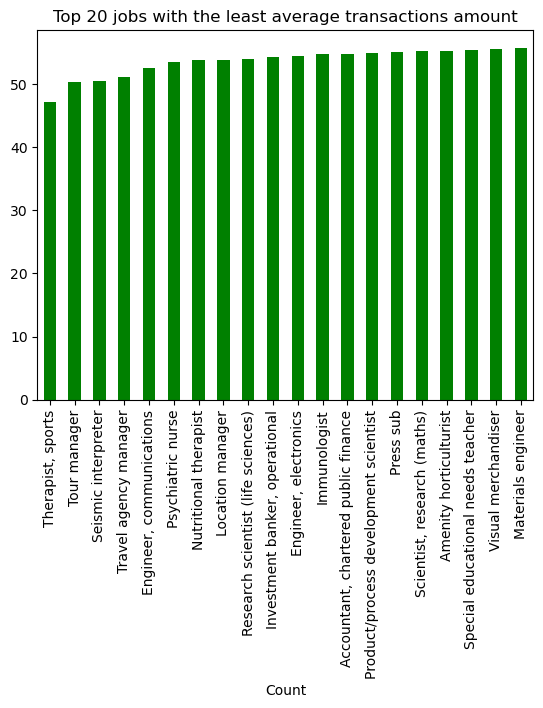

In [112]:
job_df['amt'].nsmallest(20).plot(kind='bar', title='Top 20 jobs with the least average transactions amount', \
                                xlabel='Count', color = 'g');

#### 6.10 Jobs with most fraudsters

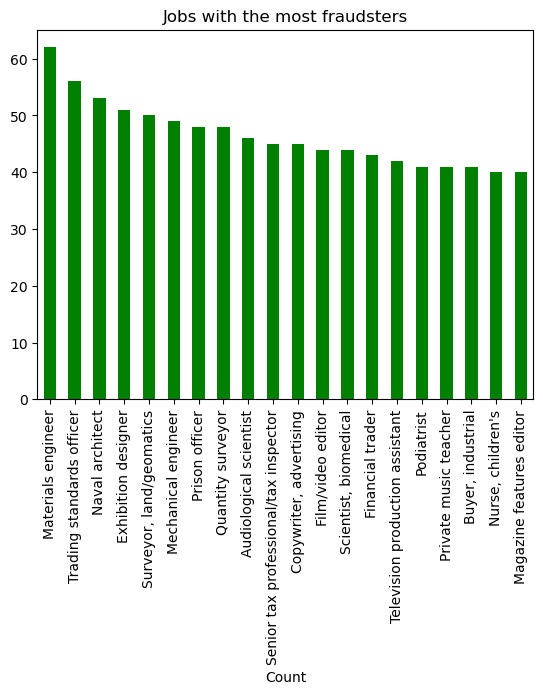

In [113]:
fraud_df['job'].value_counts()[:20].plot(kind='bar', title='Jobs with the most fraudsters', xlabel='Count', color = 'g');

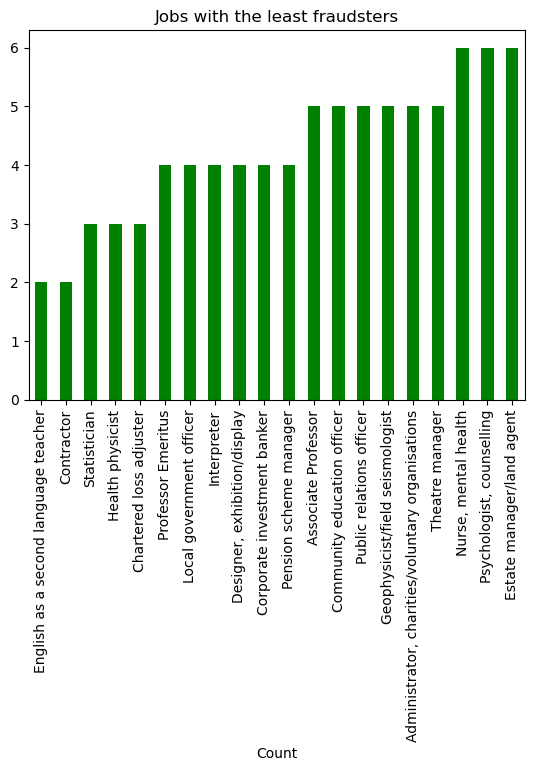

In [114]:
fraud_df['job'].value_counts().nsmallest(20).plot(kind='bar', title='Jobs with the least fraudsters', xlabel='Count', color = 'g');

#### 6.3 Number of card holders per street

In [115]:
# Number of card holders per street
credit_df['street'].value_counts()[:20].to_frame()

,street
0069 Robin Brooks Apt. 695,3123
864 Reynolds Plains,3123
8172 Robertson Parkways Suite 072,3119
4664 Sanchez Common Suite 930,3117
8030 Beck Motorway,3113
29606 Martinez Views Suite 653,3112
1652 James Mews,3110
854 Walker Dale Suite 488,3107
40624 Rebecca Spurs,3106
594 Berry Lights Apt. 392,3101


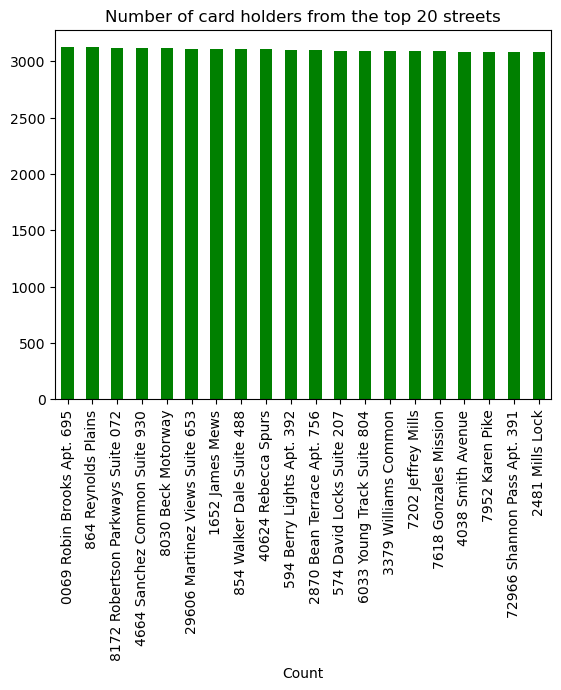

In [116]:
# Number of card holders per street
credit_df['street'].value_counts()[:20].plot(kind='bar', title='Number of card holders from the top 20 streets', xlabel='Count', color = 'g');

In [117]:
credit_df['street'].value_counts()[5:].to_frame()

,street
29606 Martinez Views Suite 653,3112
1652 James Mews,3110
854 Walker Dale Suite 488,3107
40624 Rebecca Spurs,3106
594 Berry Lights Apt. 392,3101
...,...
7281 Joshua Mills Apt. 077,7
3307 Ferguson Way,7
9599 Washington Field Suite 238,7
3437 Ross Flat Apt. 592,7


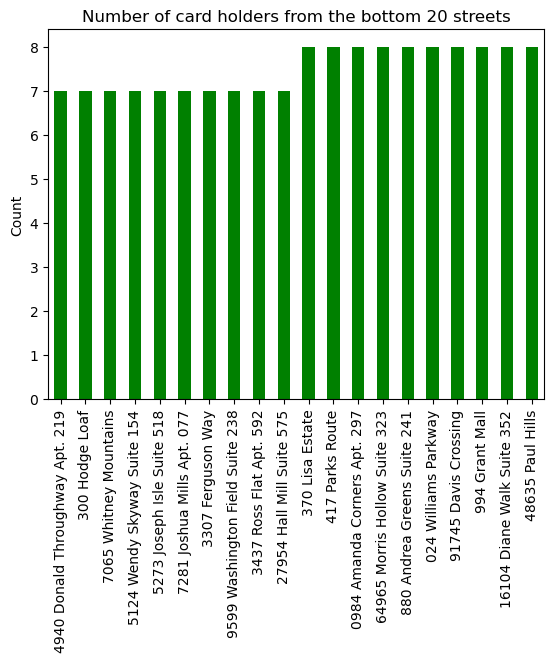

In [118]:
# Number of card holders per street
credit_df['street'].value_counts().nsmallest(20).plot(kind='bar', title='Number of card holders from the bottom 20 streets', \
                                            ylabel='Count', color = 'g');

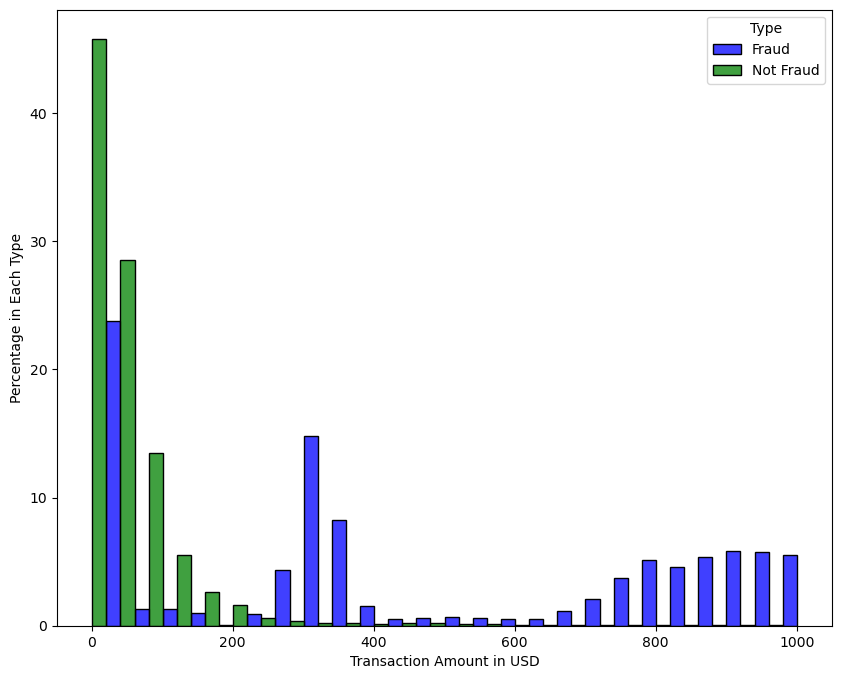

In [119]:
#amount vs fraud
f, ax = plt.subplots(figsize=(10,8))
colors = ['green', 'blue'] 
ax=sns.histplot(x='amt',data=credit_df[credit_df.amt<=1000],hue='is_fraud',
                stat='percent',multiple='dodge',common_norm=False, palette=colors, bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

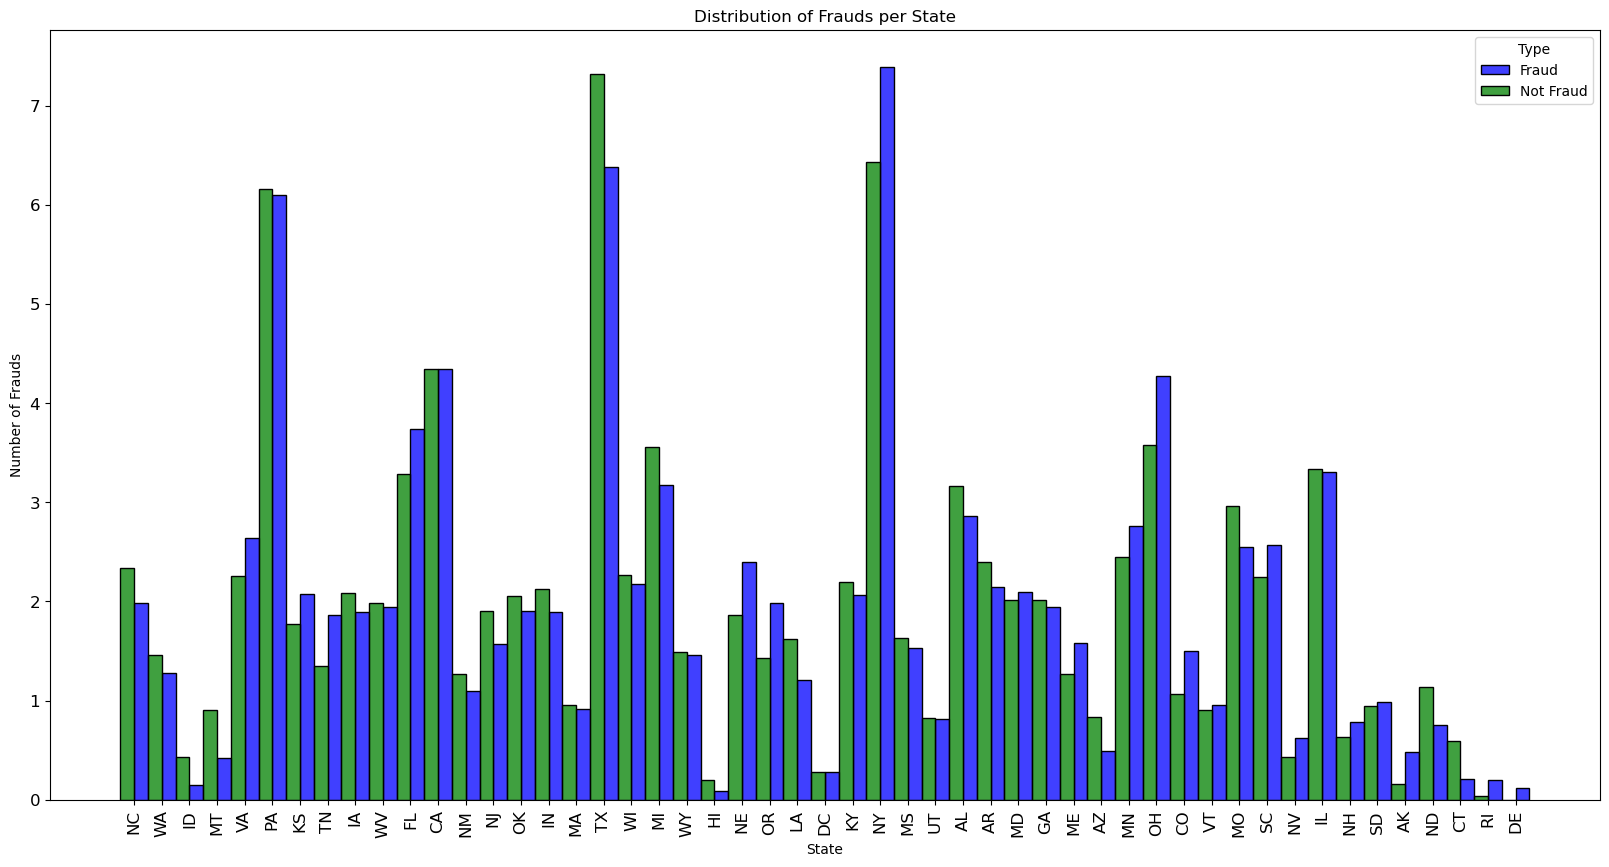

In [120]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each state
f, ax = plt.subplots(figsize=(20,10))
colors = ['green', 'blue']  # blue and green
sns.histplot(x='state', data=credit_df, hue='is_fraud', stat='percent', 
             multiple='dodge', common_norm=False, palette=colors, ax=ax)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xlabel('State')
plt.ylabel('Number of Frauds')
plt.title('Distribution of Frauds per State')
plt.show();


#### 6.8 Number of transactions per hour of the day.

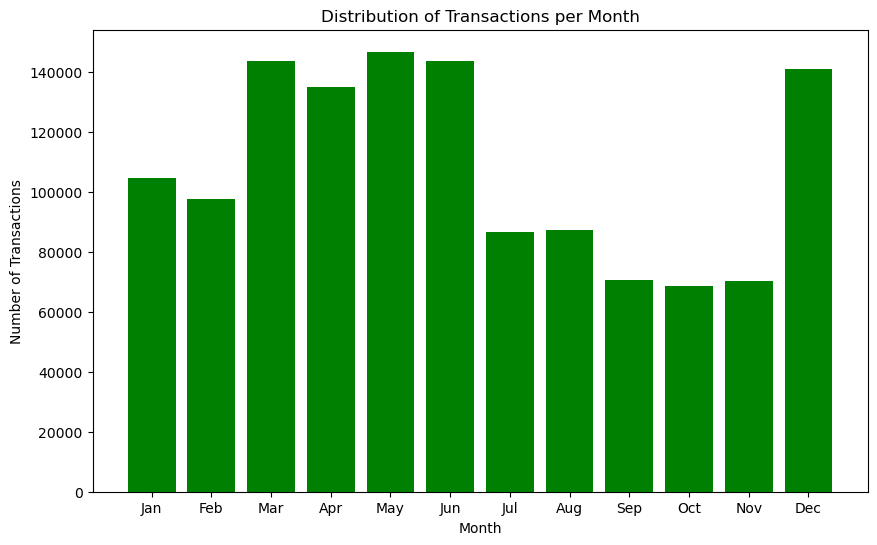

In [121]:
# Group the dataset by month and count the number of transactions in each month
transactions_per_month = credit_df.groupby(credit_df['trans_date']
                                           .dt.month)['trans_date'].count()

# Create a bar plot to visualize the distribution of transactions per month
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_month.index, transactions_per_month.values, color = "green")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions per Month')

# Set the tick locations and labels for the x-axis
plt.xticks(transactions_per_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()



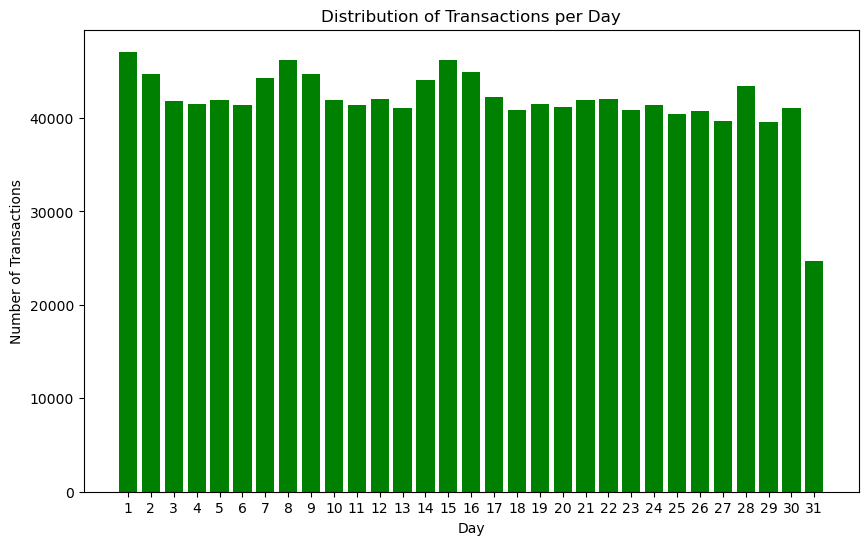

In [122]:
# Group the dataset by hour and count the number of transactions in each day
transactions_per_day = credit_df.groupby(credit_df['trans_date'].dt.day)['trans_date'].count()

# Create a histogram plot to visualize the distribution of transactions per day
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_day.index, transactions_per_day.values, color = "green")
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions per Day')

# Set the x-axis tick labels to begin from 1 to 31
plt.xticks(range(1, 32))

plt.show()


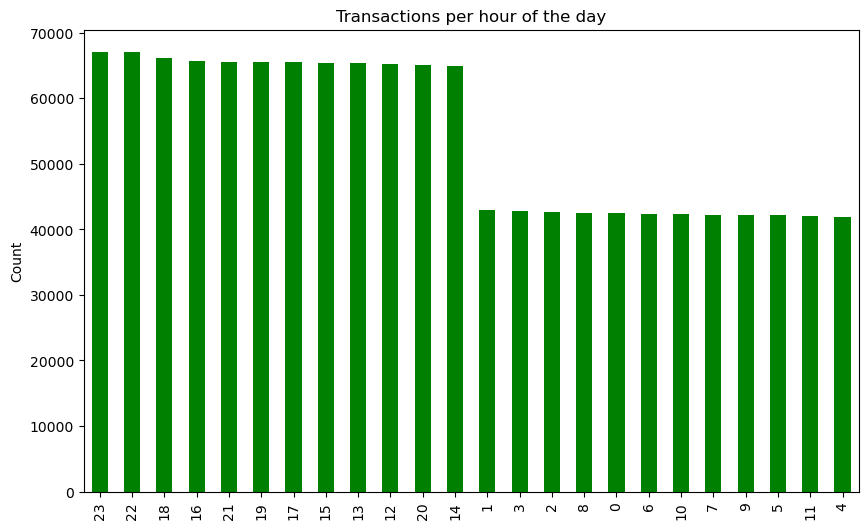

In [123]:
credit_df['hour'].value_counts().plot(kind='bar', title='Transactions per hour of the day', \
                                     ylabel='Count', color = "g", figsize=(10, 6));

#### 6.11 Ages of the card holders

In [124]:
# calculating the ages
today = datetime.today()

credit_df['age'] = today - credit_df['dob']

In [125]:
credit_df['age'] = credit_df['age'].dt.days
credit_df['age'] = credit_df['age'] / 365
credit_df['age'] = credit_df['age'].astype(int)

In [126]:
credit_df['age'].value_counts().to_frame()

,age
38,42046
50,41324
47,39432
35,38990
29,34921
...,...
89,1557
80,1517
85,1054
98,536


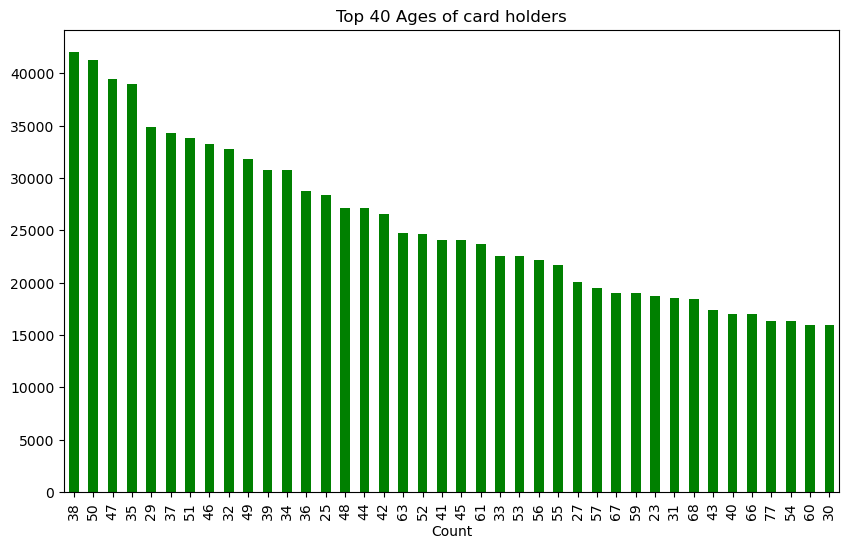

In [127]:
credit_df['age'].value_counts()[:40].plot(kind='bar', title='Top 40 Ages of card holders', xlabel='Count', color = 'g', figsize=(10, 6));

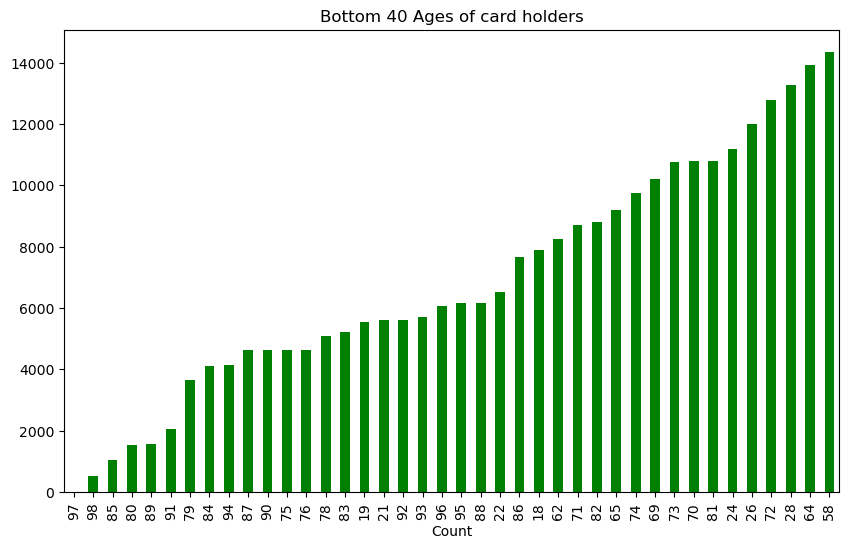

In [128]:
credit_df['age'].value_counts().nsmallest(40).plot(kind='bar', title='Bottom 40 Ages of card holders', xlabel='Count', color ='g', figsize=(10, 6))
plt.show()


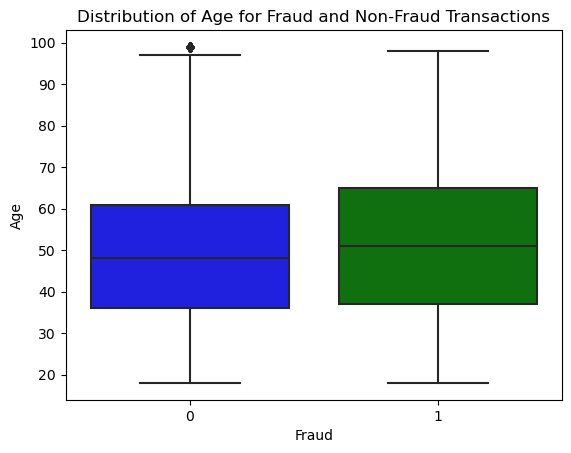

In [129]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

credit_df['age'] = dt.date.today().year - pd.to_datetime(credit_df['dob']).dt.year

# Create a box plot to compare the distribution of age for fraud and non-fraud transactions
colors = ['blue', 'green']
sns.boxplot(x='is_fraud', y='age', data=credit_df, palette=colors)
plt.title('Distribution of Age for Fraud and Non-Fraud Transactions')
plt.xlabel("Fraud")
plt.ylabel("Age")
plt.show()


#### 6.12 Categories and average amount spend

In [130]:
credit_df['category'].value_counts().to_frame()

,category
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758
health_fitness,85879


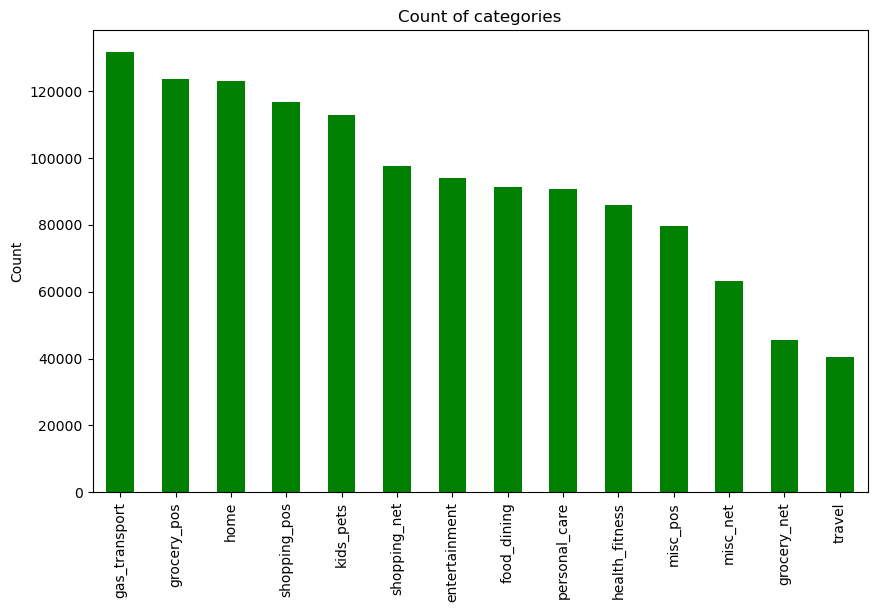

In [135]:
credit_df['category'].value_counts().plot(kind='bar', title='Count of categories', ylabel='Count',
                                          color="g",figsize=(10, 6));

In [132]:
category_df = credit_df.groupby(['category']).mean()
category_df['amt'] = category_df['amt'].astype(int)

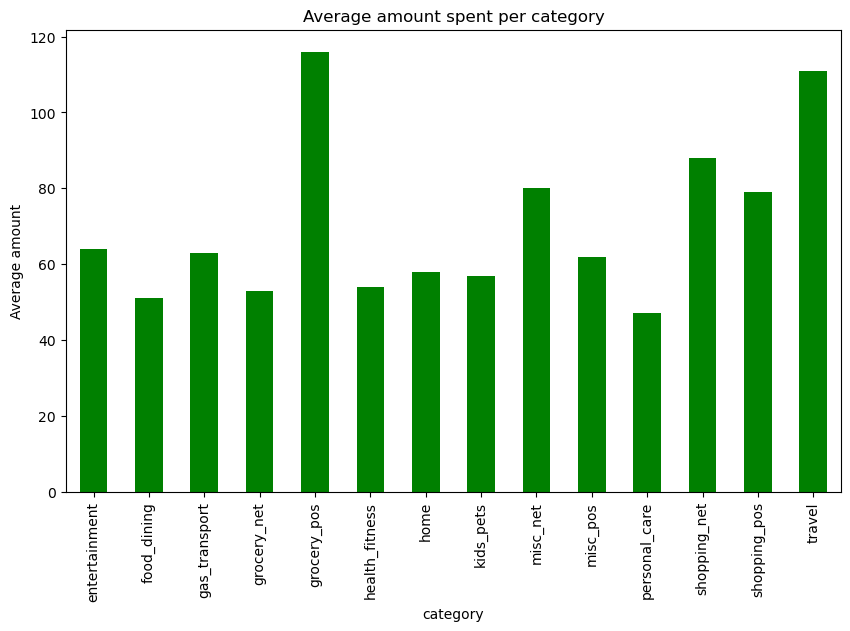

In [134]:
category_df['amt'].plot(kind='bar', title='Average amount spent per category', ylabel='Average amount', 
                        color="g", figsize=(10, 6));

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?